In [1]:
!pip install trimesh open3d matplotlib numpy tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [39]:
# Upload any ZIP file from your laptop
from google.colab import files
uploaded = files.upload()   # Opens file chooser
import zipfile
import os

# Name of the file you uploaded (change if needed)
zip_path = "8samples.zip"

# Create a folder to extract into
extract_to = "meshes"
os.makedirs(extract_to, exist_ok=True)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# List the extracted files
print("Files extracted to:", extract_to)
os.listdir(extract_to)



Saving 8samples.zip to 8samples (4).zip
Files extracted to: meshes


['__MACOSX', '8samples', '8samples (2).zip']

In [19]:
# Cell 1 — install required packages
!pip install trimesh[all] numpy matplotlib



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [16]:
def load_mesh(path):
    loaded = trimesh.load(path, process=False)
    if isinstance(loaded, trimesh.Scene):
        print("ℹ️ Detected Scene in:", path)
        mesh = trimesh.util.concatenate(tuple(loaded.dump()))
    else:
        mesh = loaded
    verts = np.asarray(mesh.vertices, dtype=np.float64)
    return mesh, verts


In [18]:
import numpy as np

print("==== Task 1: Inspecting meshes ====\n")
for i, path in enumerate(obj_files):
    verts, faces = load_vertices(path)
    print(f"File {i+1}: {os.path.basename(path)}")
    print(f"  vertices: {verts.shape[0]}")
    for ax, name in enumerate(['x','y','z']):
        print(f"    {name}: min={verts[:,ax].min():.6f}, max={verts[:,ax].max():.6f}, mean={verts[:,ax].mean():.6f}, std={verts[:,ax].std():.6f}")
    print("")


==== Task 1: Inspecting meshes ====

File 1: person.obj
  vertices: 3106
    x: min=-0.843750, max=0.841797, mean=0.005003, std=0.395246
    y: min=-0.000000, max=1.900391, mean=1.159242, std=0.511691
    z: min=-0.212891, max=0.210938, mean=-0.003599, std=0.095107

File 2: talwar.obj
  vertices: 1681
    x: min=-0.031922, max=0.031922, mean=0.021711, std=0.011133
    y: min=0.000000, max=1.000000, mean=0.302501, std=0.236434
    z: min=-0.117146, max=0.117146, mean=-0.004354, std=0.046616

File 3: table.obj
  vertices: 3148
    x: min=-0.208906, max=0.208906, mean=-0.013190, std=0.153119
    y: min=-0.000000, max=0.611761, mean=0.386374, std=0.191922
    z: min=-0.500000, max=0.500000, mean=-0.003587, std=0.346052

File 4: explosive.obj
  vertices: 2844
    x: min=-0.199625, max=0.199625, mean=0.043256, std=0.114991
    y: min=0.000000, max=1.000000, mean=0.530389, std=0.389781
    z: min=-0.197126, max=0.197126, mean=-0.004593, std=0.094903

File 5: cylinder.obj
  vertices: 192
    x

In [9]:
# Upload ZIP or use an existing zip in working directory.
import os
from google.colab import files
import zipfile
import glob
import shutil

# If you already have the zip in the notebook environment, put its name here:
FALLBACK_ZIP = "8samples.zip"  # if you already uploaded to Colab via Files UI, or change name

uploaded = files.upload()  # click and choose your 8samples.zip (or any zip with .obj files)
zip_name = None
if uploaded:
    # take the first uploaded file
    zip_name = list(uploaded.keys())[0]
    print("Uploaded:", zip_name)

# fallback if user didn't upload via the dialog but the file exists already
if zip_name is None and os.path.exists(FALLBACK_ZIP):
    zip_name = FALLBACK_ZIP
    print("Using existing file in working dir:", zip_name)

if zip_name is None:
    raise FileNotFoundError("No zip uploaded and no fallback zip present. Re-run and upload your 8samples.zip.")

# extract to `samples` folder
extract_dir = "samples"
if os.path.exists(extract_dir):
    shutil.rmtree(extract_dir)
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as z:
    # Extract only relevant files, ignore __MACOSX
    members = [m for m in z.namelist() if not m.startswith("__MACOSX") and not m.endswith('/')]
    z.extractall(path=extract_dir, members=members)

# find .obj files (recursively)
obj_files = glob.glob(os.path.join(extract_dir, "**", "*.obj"), recursive=True)
print(f"Found {len(obj_files)} .obj files. Sample listing (up to 20):")
for i, f in enumerate(obj_files[:20]):
    print(i+1, f)

if len(obj_files) == 0:
    raise FileNotFoundError("No .obj files found inside the zip. Check the zip contents.")


Saving 8samples.zip to 8samples.zip
Uploaded: 8samples.zip
Found 8 .obj files. Sample listing (up to 20):
1 samples/8samples/person.obj
2 samples/8samples/talwar.obj
3 samples/8samples/table.obj
4 samples/8samples/explosive.obj
5 samples/8samples/cylinder.obj
6 samples/8samples/branch.obj
7 samples/8samples/fence.obj
8 samples/8samples/girl.obj


In [11]:
!pip install trimesh open3d matplotlib numpy plyfile -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00


In [12]:
import numpy as np
import trimesh
import os
from plyfile import PlyData, PlyElement

def load_vertices(obj_path):
    mesh = trimesh.load(obj_path, process=False)
    verts = np.array(mesh.vertices, dtype=np.float64)
    faces = np.array(mesh.faces, dtype=np.int32) if hasattr(mesh, 'faces') else None
    return verts, faces

def save_ply_vertices(outfile, vertices, faces=None):
    # Save vertices and faces to a PLY (ascii) for easy viewing
    verts_tuple = [(float(x), float(y), float(z)) for x,y,z in vertices]
    vertex_el = PlyElement.describe(np.array(verts_tuple, dtype=[('x','f4'),('y','f4'),('z','f4')]), 'vertex')
    if faces is not None:
        faces_tuple = [(list(face),) for face in faces]
        face_el = PlyElement.describe(np.array(faces_tuple, dtype=[('vertex_indices', 'i4', (3,))]), 'face')
        PlyData([vertex_el, face_el]).write(outfile)
    else:
        PlyData([vertex_el]).write(outfile)

# Normalization methods
def minmax_normalize(vertices, feature_range=(0.0, 1.0)):
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    denom = (v_max - v_min)
    denom[denom == 0] = 1.0  # avoid div by zero for flat axes
    normalized = (vertices - v_min) / denom
    return normalized, v_min, v_max

def minmax_denormalize(norm_vertices, v_min, v_max):
    return norm_vertices * (v_max - v_min) + v_min

def unit_sphere_normalize(vertices):
    centroid = vertices.mean(axis=0)
    centered = vertices - centroid
    max_dist = np.linalg.norm(centered, axis=1).max()
    if max_dist == 0:
        max_dist = 1.0
    normalized = centered / max_dist
    return normalized, centroid, max_dist

def unit_sphere_denormalize(norm_vertices, centroid, max_dist):
    return norm_vertices * max_dist + centroid

# Quantize / Dequantize
def quantize(norm_vertices, n_bins=1024):
    q = np.floor(norm_vertices * (n_bins - 1)).astype(np.int32)
    q = np.clip(q, 0, n_bins-1)
    return q

def dequantize(q, n_bins=1024):
    return q.astype(np.float64) / (n_bins - 1)


In [20]:

import os
import numpy as np

OUT_DIR = "processed"
os.makedirs(OUT_DIR, exist_ok=True)

n_bins = 1024

summary = []  # will hold file->results

for path in obj_files:
    name = os.path.splitext(os.path.basename(path))[0]
    verts, faces = load_vertices(path)

    # Min-Max
    mm_norm, vmin, vmax = minmax_normalize(verts)
    mm_q = quantize(mm_norm, n_bins=n_bins)
    mm_q_path = os.path.join(OUT_DIR, f"{name}_minmax_quantized.npy")
    np.save(mm_q_path, mm_q)
    # Save dequantized normalized back to ply for visualization
    mm_deq_norm = dequantize(mm_q, n_bins=n_bins)
    mm_recon = minmax_denormalize(mm_deq_norm, vmin, vmax)
    save_ply_vertices(os.path.join(OUT_DIR, f"{name}_minmax_quant_recon.ply"), mm_recon, faces)

    # Unit Sphere
    us_norm, centroid, max_dist = unit_sphere_normalize(verts)
    # shift to [0,1] before quantizing (quantization formula expects [0,1])
    # For unit sphere we map [-1,1] -> [0,1] when needed. But our unit sphere normalization yields [-1,1] at most.
    us_norm_01 = (us_norm + 1.0) / 2.0
    us_q = quantize(us_norm_01, n_bins=n_bins)
    us_q_path = os.path.join(OUT_DIR, f"{name}_unitsphere_quantized.npy")
    np.save(us_q_path, us_q)
    us_deq_norm_01 = dequantize(us_q, n_bins=n_bins)
    us_deq_norm = us_deq_norm_01 * 2.0 - 1.0
    us_recon = unit_sphere_denormalize(us_deq_norm, centroid, max_dist)
    save_ply_vertices(os.path.join(OUT_DIR, f"{name}_unitsphere_quant_recon.ply"), us_recon, faces)

    # Save normalized vertices (optional)
    np.save(os.path.join(OUT_DIR, f"{name}_minmax_normalized.npy"), mm_norm)
    np.save(os.path.join(OUT_DIR, f"{name}_unitsphere_normalized.npy"), us_norm)

    summary.append({
        'name': name,
        'orig_vertices': verts,
        'minmax': {'vmin': vmin, 'vmax': vmax, 'quant_path': mm_q_path, 'recon_ply': f"{name}_minmax_quant_recon.ply"},
        'unitsphere': {'centroid': centroid, 'max_dist': max_dist, 'quant_path': us_q_path, 'recon_ply': f"{name}_unitsphere_quant_recon.ply"}
    })

print("Saved processed files to:", OUT_DIR)
print("Summary entries:", len(summary))
import open3d as o3d




Saved processed files to: processed
Summary entries: 8


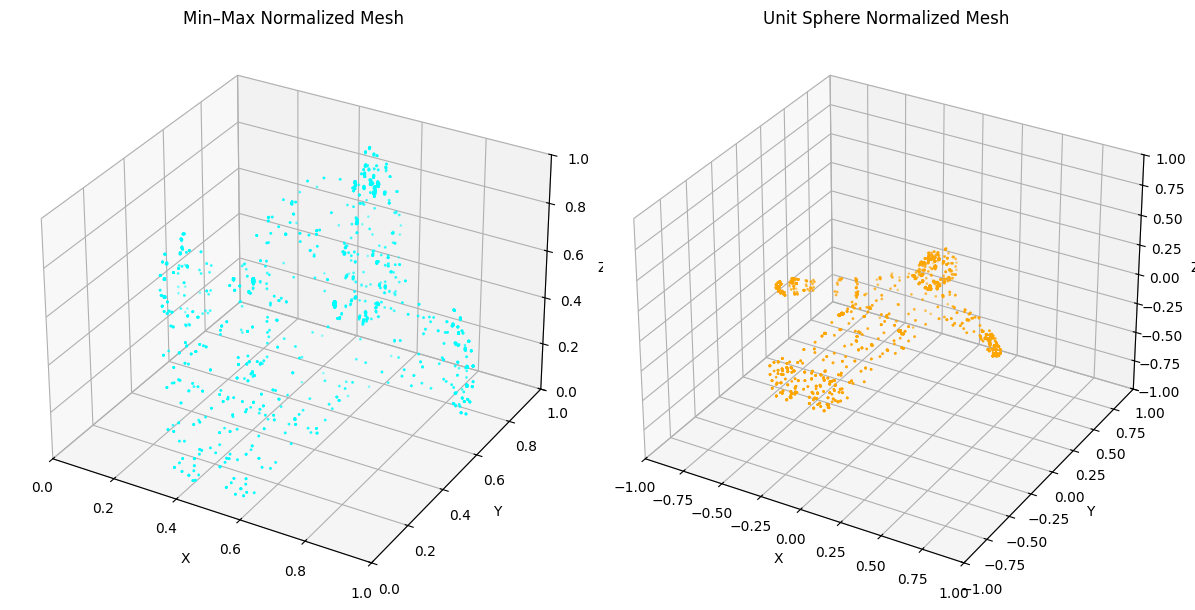

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sample = summary[0]['name']
mm_norm = np.load(os.path.join(OUT_DIR, f"{sample}_minmax_normalized.npy"))
us_norm = np.load(os.path.join(OUT_DIR, f"{sample}_unitsphere_normalized.npy"))

fig = plt.figure(figsize=(12,6))

# Min–Max
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(mm_norm[:,0], mm_norm[:,1], mm_norm[:,2], s=1, c='cyan')
ax1.set_title('Min–Max Normalized Mesh')
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
ax1.set_xlim(0,1); ax1.set_ylim(0,1); ax1.set_zlim(0,1)

# Unit Sphere
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(us_norm[:,0], us_norm[:,1], us_norm[:,2], s=1, c='orange')
ax2.set_title('Unit Sphere Normalized Mesh')
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.set_xlim(-1,1); ax2.set_ylim(-1,1); ax2.set_zlim(-1,1)

plt.tight_layout()
plt.show()





Showing: person


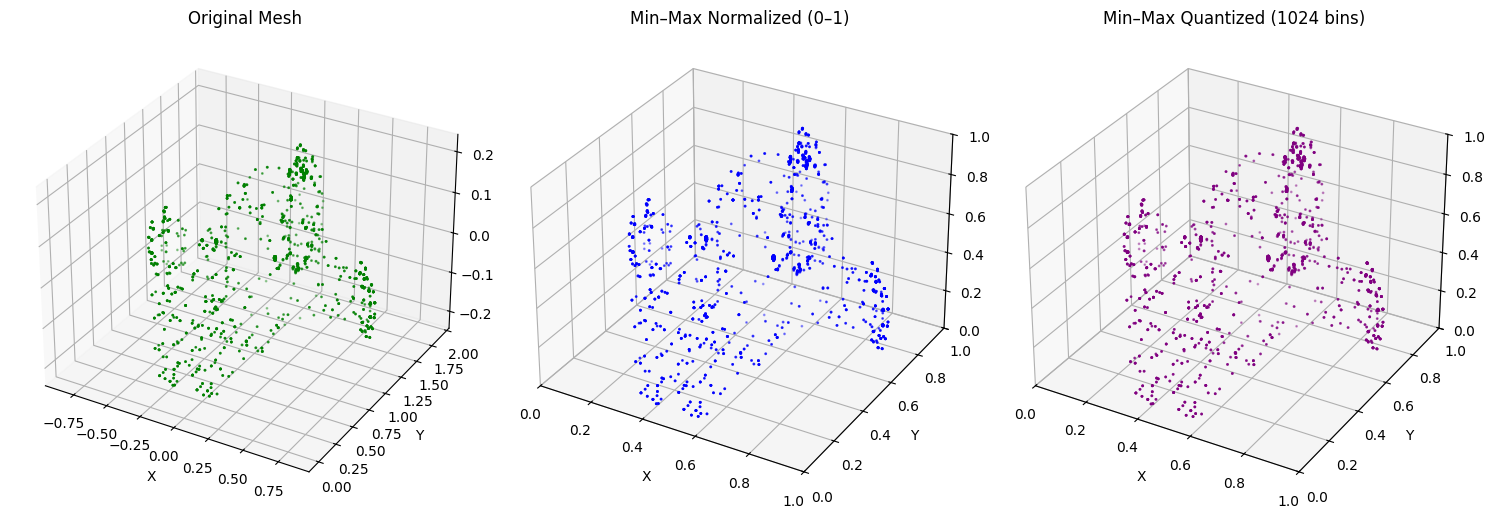

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# pick one mesh
sample = summary[0]['name']
print("Showing:", sample)

orig = summary[0]['orig_vertices']
mm_norm = np.load(os.path.join(OUT_DIR, f"{sample}_minmax_normalized.npy"))
mm_q = np.load(os.path.join(OUT_DIR, f"{sample}_minmax_quantized.npy"))
# dequantize for plotting (bring back to 0–1)
mm_q_deq = mm_q / 1023.0

fig = plt.figure(figsize=(15,5))

# --- Original ---
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(orig[:,0], orig[:,1], orig[:,2], s=1, c='green')
ax1.set_title('Original Mesh')
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')

# --- Min–Max Normalized ---
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(mm_norm[:,0], mm_norm[:,1], mm_norm[:,2], s=1, c='blue')
ax2.set_title('Min–Max Normalized (0–1)')
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.set_xlim(0,1); ax2.set_ylim(0,1); ax2.set_zlim(0,1)

# --- Min–Max Quantized ---
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(mm_q_deq[:,0], mm_q_deq[:,1], mm_q_deq[:,2], s=1, c='purple')
ax3.set_title('Min–Max Quantized (1024 bins)')
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
ax3.set_xlim(0,1); ax3.set_ylim(0,1); ax3.set_zlim(0,1)

plt.tight_layout()
plt.show()


Showing: person


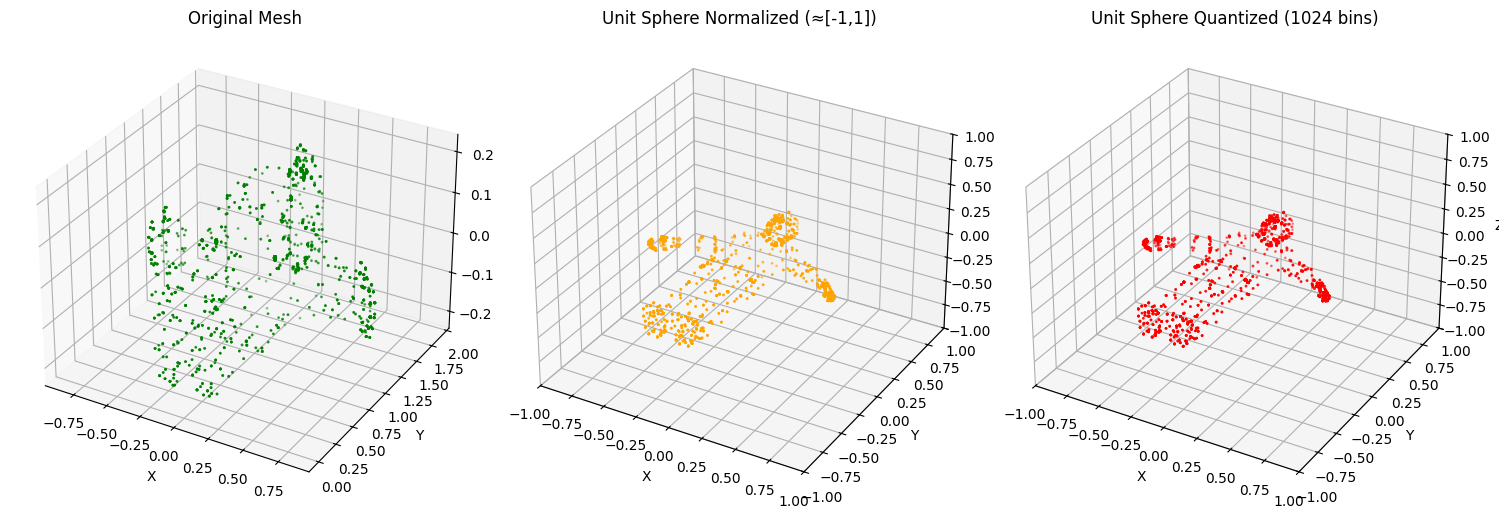

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Pick one mesh (same as used earlier)
sample = summary[0]['name']
print("Showing:", sample)

# Load data
orig = summary[0]['orig_vertices']
us_norm = np.load(os.path.join(OUT_DIR, f"{sample}_unitsphere_normalized.npy"))
us_q = np.load(os.path.join(OUT_DIR, f"{sample}_unitsphere_quantized.npy"))

# Convert quantized values back to [-1,1] range for viewing
us_q_deq = (us_q / 1023.0) * 2.0 - 1.0

fig = plt.figure(figsize=(15,5))

# --- Original ---
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(orig[:,0], orig[:,1], orig[:,2], s=1, c='green')
ax1.set_title('Original Mesh')
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')

# --- Unit Sphere Normalized ---
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(us_norm[:,0], us_norm[:,1], us_norm[:,2], s=1, c='orange')
ax2.set_title('Unit Sphere Normalized (≈[-1,1])')
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.set_xlim(-1,1); ax2.set_ylim(-1,1); ax2.set_zlim(-1,1)

# --- Unit Sphere Quantized ---
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(us_q_deq[:,0], us_q_deq[:,1], us_q_deq[:,2], s=1, c='red')
ax3.set_title('Unit Sphere Quantized (1024 bins)')
ax3.set_xlabel('X'); ax3.set_ylabel('Y'); ax3.set_zlabel('Z')
ax3.set_xlim(-1,1); ax3.set_ylim(-1,1); ax3.set_zlim(-1,1)

plt.tight_layout()
plt.show()


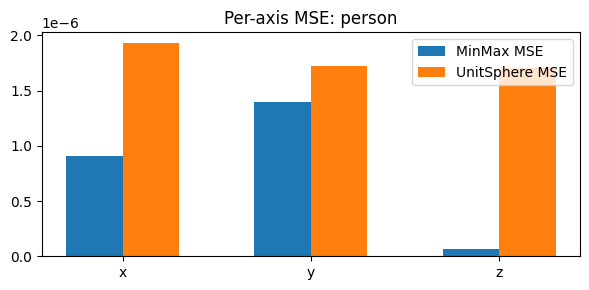

=== person ===
MinMax MSE axis: [9.08378069e-07 1.39712714e-06 6.15529177e-08] overall MSE: 2.367058123042045e-06 overall MAE: 0.001455783463862126
UnitSphere MSE axis: [1.93167230e-06 1.72542983e-06 1.70501385e-06] overall MSE: 5.362115980475912e-06 overall MAE: 0.0022171813550583295
Saved recon PLYs: person_minmax_quant_recon.ply , person_unitsphere_quant_recon.ply



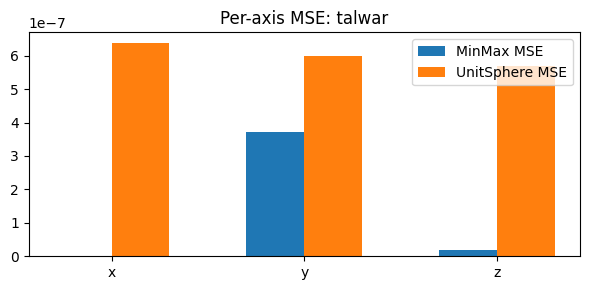

=== talwar ===
MinMax MSE axis: [1.38724815e-09 3.72587679e-07 1.80603935e-08] overall MSE: 3.9203532107250176e-07 overall MAE: 0.0005631346419400984
UnitSphere MSE axis: [6.37817291e-07 5.97972414e-07 5.70241797e-07] overall MSE: 1.806031502198038e-06 overall MAE: 0.0012886170834610709
Saved recon PLYs: talwar_minmax_quant_recon.ply , talwar_unitsphere_quant_recon.ply



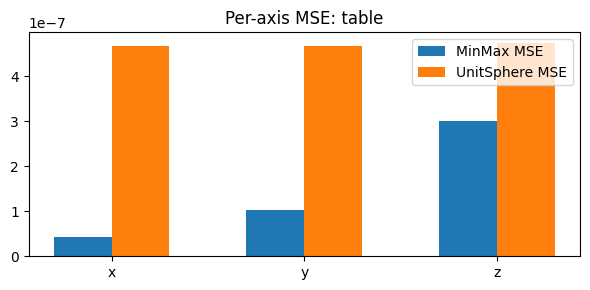

=== table ===
MinMax MSE axis: [4.33102077e-08 1.03099218e-07 3.00024412e-07] overall MSE: 4.4643383817057465e-07 overall MAE: 0.0006323739167089781
UnitSphere MSE axis: [4.67868783e-07 4.68174621e-07 4.73810228e-07] overall MSE: 1.4098536313703447e-06 overall MAE: 0.0011411901519762719
Saved recon PLYs: table_minmax_quant_recon.ply , table_unitsphere_quant_recon.ply



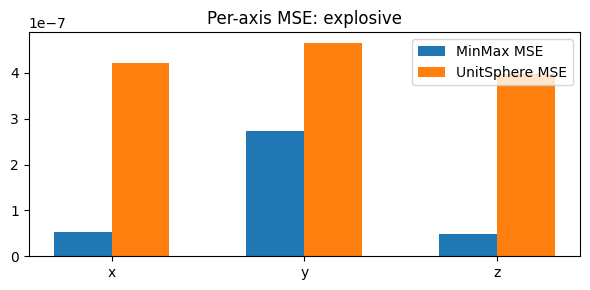

=== explosive ===
MinMax MSE axis: [5.25434026e-08 2.72055138e-07 4.79717564e-08] overall MSE: 3.725702964690105e-07 overall MAE: 0.0005666249797917837
UnitSphere MSE axis: [4.21086381e-07 4.64847950e-07 3.97405470e-07] overall MSE: 1.2833398010851314e-06 overall MAE: 0.001094656303413448
Saved recon PLYs: explosive_minmax_quant_recon.ply , explosive_unitsphere_quant_recon.ply



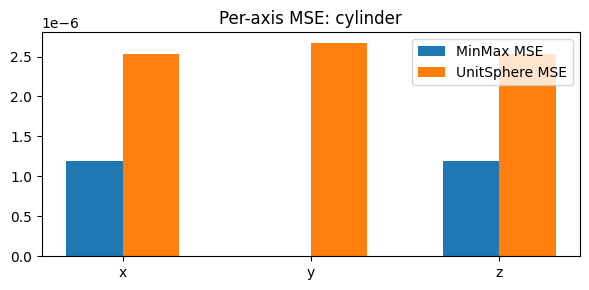

=== cylinder ===
MinMax MSE axis: [1.19493876e-06 0.00000000e+00 1.19493876e-06] overall MSE: 2.3898775263100744e-06 overall MAE: 0.001436153347601985
UnitSphere MSE axis: [2.52570235e-06 2.66928610e-06 2.52570235e-06] overall MSE: 7.720690800229603e-06 overall MAE: 0.0026647383362453383
Saved recon PLYs: cylinder_minmax_quant_recon.ply , cylinder_unitsphere_quant_recon.ply



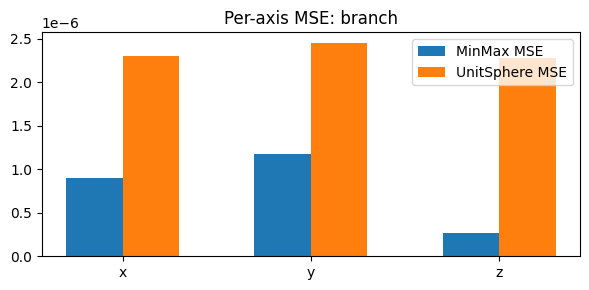

=== branch ===
MinMax MSE axis: [8.98318473e-07 1.17372106e-06 2.72539235e-07] overall MSE: 2.344578767482732e-06 overall MAE: 0.001451965614192507
UnitSphere MSE axis: [2.29703998e-06 2.44960028e-06 2.27156909e-06] overall MSE: 7.018209352904427e-06 overall MAE: 0.0025435360902147774
Saved recon PLYs: branch_minmax_quant_recon.ply , branch_unitsphere_quant_recon.ply



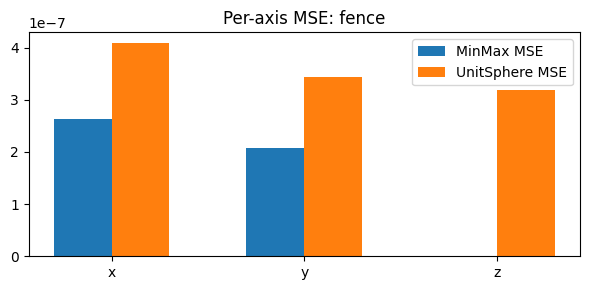

=== fence ===
MinMax MSE axis: [2.63610736e-07 2.06940121e-07 8.52095947e-11] overall MSE: 4.706360665706727e-07 overall MAE: 0.0006341293348932148
UnitSphere MSE axis: [4.08932663e-07 3.44588295e-07 3.18955752e-07] overall MSE: 1.0724767110457108e-06 overall MAE: 0.000981942646262565
Saved recon PLYs: fence_minmax_quant_recon.ply , fence_unitsphere_quant_recon.ply



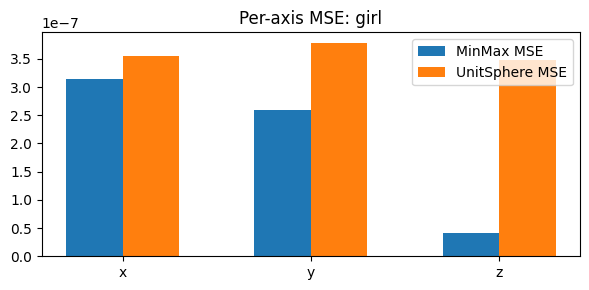

=== girl ===
MinMax MSE axis: [3.14802002e-07 2.59464563e-07 4.20036572e-08] overall MSE: 6.162702220649437e-07 overall MAE: 0.000744670792339895
UnitSphere MSE axis: [3.54900574e-07 3.78126002e-07 3.48793126e-07] overall MSE: 1.0818197011629223e-06 overall MAE: 0.0009992386243253468
Saved recon PLYs: girl_minmax_quant_recon.ply , girl_unitsphere_quant_recon.ply



In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os

results = []

for entry in summary:
    name = entry['name']
    verts = entry['orig_vertices']

    # Load minmax quantized and reconstruct
    mm_q = np.load(entry['minmax']['quant_path'])
    mm_deq_norm = dequantize(mm_q, n_bins=n_bins)
    mm_recon = minmax_denormalize(mm_deq_norm, entry['minmax']['vmin'], entry['minmax']['vmax'])

    # Load unitsphere quantized and reconstruct
    us_q = np.load(entry['unitsphere']['quant_path'])
    us_deq_norm_01 = dequantize(us_q, n_bins=n_bins)
    us_deq_norm = us_deq_norm_01 * 2.0 - 1.0
    us_recon = unit_sphere_denormalize(us_deq_norm, entry['unitsphere']['centroid'], entry['unitsphere']['max_dist'])

    # Compute errors per axis
    def compute_errors(orig, recon):
        diff = orig - recon
        mse_per_axis = np.mean(diff**2, axis=0)
        mae_per_axis = np.mean(np.abs(diff), axis=0)
        overall_mse = np.mean(np.sum(diff**2, axis=1))
        overall_mae = np.mean(np.linalg.norm(diff, axis=1))
        return {'mse_axis': mse_per_axis, 'mae_axis': mae_per_axis, 'mse_overall': overall_mse, 'mae_overall': overall_mae}

    mm_err = compute_errors(verts, mm_recon)
    us_err = compute_errors(verts, us_recon)

    results.append({'name': name, 'minmax_err': mm_err, 'unitsphere_err': us_err})

    # Plot per-axis MSE comparison
    fig, ax = plt.subplots(figsize=(6,3))
    x = np.arange(3)
    ax.bar(x-0.15, mm_err['mse_axis'], width=0.3, label='MinMax MSE')
    ax.bar(x+0.15, us_err['mse_axis'], width=0.3, label='UnitSphere MSE')
    ax.set_xticks(x)
    ax.set_xticklabels(['x','y','z'])
    ax.set_title(f"Per-axis MSE: {name}")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # Print summary numbers
    print(f"=== {name} ===")
    print("MinMax MSE axis:", mm_err['mse_axis'], "overall MSE:", mm_err['mse_overall'], "overall MAE:", mm_err['mae_overall'])
    print("UnitSphere MSE axis:", us_err['mse_axis'], "overall MSE:", us_err['mse_overall'], "overall MAE:", us_err['mae_overall'])
    print("Saved recon PLYs:", entry['minmax']['recon_ply'], ",", entry['unitsphere']['recon_ply'])
    print("")
